# Cars4U Project : predict the price of used cars using **Linear Regression**

## Problem Statement 

Pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

## Objective

1. Explore and visualize the dataset.
2. Build a linear regression model to predict the prices of used cars.
3. Generate a set of insights and recommendations that will help the business.

## Data Dictionary 

1. S.No. : Serial Number
2. Name : Name of the car which includes Brand name and Model name
3. Location : The location in which the car is being sold or is available for purchase Cities
4. Year : Manufacturing year of the car
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission : The type of transmission used by the car. (Automatic / Manual)
8. Owner : Type of ownership
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
10. Engine : The displacement volume of the engine in CC.
11. Power : The maximum power of the engine in bhp.
12. Seats : The number of seats in the car.
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

## 1. Loading libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# To create linear regression model
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To Split into Train and Test
from sklearn.model_selection import train_test_split


# To calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import mutual_info_regression

import pylab
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

## 2. Loading and exploring the data

In [2]:
df = pd.read_csv("used_cars_data.csv")
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.') 
df.head()

There are 7253 rows and 14 columns.


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Looking at the columns SNO is not a useful column so we can drop the column. 

In [3]:
df.drop(['S.No.'],axis=1,inplace=True)

In [4]:
df.info() # 13 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


## 3. Missing Values

In [5]:
df.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [6]:
# function to display Missing values for a dataframe
def checkna(data):
    missing_values= data.isna().sum().reset_index()
    missing_values.columns= ["Features", "Missing_Values"]
    missing_values["Missing_Percent"]= round(missing_values.Missing_Values/len(data)*100,2)
    return missing_values[missing_values.Missing_Values > 0 ]

In [7]:
checkna(df)

,Features,Missing_Values,Missing_Percent
7,Mileage,2,0.03
8,Engine,46,0.63
9,Power,46,0.63
10,Seats,53,0.73
11,New_Price,6247,86.13
12,Price,1234,17.01


86% of New Price Data is missing and it mightbe just worth dropping the columns completely since we have no other way to impute them. 

In [8]:
df.drop(["New_Price"], axis=1,inplace=True)

In [9]:
checkna(df)

,Features,Missing_Values,Missing_Percent
7,Mileage,2,0.03
8,Engine,46,0.63
9,Power,46,0.63
10,Seats,53,0.73
11,Price,1234,17.01


Price is the Independent variable and is missing it will not helpful to for training and testing and its best to drop these rows. 

In [10]:
df.drop(df[df['Price'].isnull()].index, inplace=True)


In [11]:
checkna(df)

,Features,Missing_Values,Missing_Percent
7,Mileage,2,0.03
8,Engine,36,0.60
9,Power,36,0.60
10,Seats,42,0.70


In [12]:
df[df['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


2 rows is missing values, intersting that both are electric cars 

- Mahindra E Verito D4	110 km/full charge
- Toyota Prius 2009-2016 Z4	20.1 kmpl

In [13]:
df.loc[df['Name'] == 'Mahindra E Verito D4', 'Mileage'] = '110 km/full charge'
df.loc[df['Name'] == 'Toyota Prius 2009-2016 Z4', 'Mileage'] = '20.1 kmpl'

In [14]:
checkna(df)

,Features,Missing_Values,Missing_Percent
8,Engine,36,0.6
9,Power,36,0.6
10,Seats,42,0.7


In [15]:
df[df['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.60
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,1.70


In [16]:
# lets check if there are other row with seats information for the same car.
df[df['Name'] == 'Honda City 1.5 GXI']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
3305,Honda City 1.5 GXI,Jaipur,2007,75055,Petrol,Manual,First,12.8 kmpl,1493 CC,100 bhp,5.0,2.30
4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.8 kmpl,1493 CC,100 bhp,5.0,1.10
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.85


only very few Names have seats we could just fill the rest of them will mean values. 

In [17]:
df.loc[df['Name'] == 'Honda City 1.5 GXI', 'Seats'] = 5
df['Seats'].fillna(df['Seats'].median(), inplace=True)  # mean imputation

In [18]:
checkna(df)

,Features,Missing_Values,Missing_Percent
8,Engine,36,0.6
9,Power,36,0.6


Its intersting that same number of missing values for Engine and Power 

In [19]:
df[df['Engine'].isnull() & df['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,5.0,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,5.0,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,5.0,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,5.0,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,5.0,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,5.0,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,5.0,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,5.0,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,5.0,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,5.0,1.93


Before treating missing values for Engine and Power we need to convert them into numeric. 

In [20]:
def remove_units(val):
    if isinstance(val, str):  # checks if `val` is a string
        splt = val.split()[0]
        if (splt == "null"):
            return np.nan
        else: 
            return float(splt)
    else:
        return np.nan
    
unit_cols = ['Mileage', 'Engine', 'Power']
for colname in unit_cols:
    df[colname] = df[colname].apply(remove_units)

In [21]:
checkna(df)

,Features,Missing_Values,Missing_Percent
8,Engine,36,0.60
9,Power,143,2.38


In [22]:
df['Engine'].fillna(df['Engine'].median(), inplace=True)  # mean imputation
df['Power'].fillna(df['Power'].median(), inplace=True)  # mean imputation

In [23]:
checkna(df)

,Features,Missing_Values,Missing_Percent


we have some row with 0 mileage before imputing them with mean lets take a look at the summary

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.0
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.00,73000.00,6500000.0
Mileage,6019.0,18.150550,4.732137,0.00,15.17,18.16,21.10,110.0
Engine,6019.0,1620.509221,599.635458,72.00,1198.00,1493.00,1969.00,5998.0
Power,6019.0,112.883539,53.283701,34.20,78.00,97.70,138.03,560.0
Seats,6019.0,5.276790,0.806346,0.00,5.00,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.0


we could do mean imputation for these missing values as well 

In [25]:
df[df['Mileage'] == 0 ]['Mileage'].value_counts()

0.0    68
Name: Mileage, dtype: int64

In [26]:
df[df['Seats'] == 0 ]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,97.7,0.0,18.0


In [27]:
df.loc[df['Seats'] == 0, 'Seats'] = 4

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.0
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.00,73000.00,6500000.0
Mileage,6019.0,18.150550,4.732137,0.00,15.17,18.16,21.10,110.0
Engine,6019.0,1620.509221,599.635458,72.00,1198.00,1493.00,1969.00,5998.0
Power,6019.0,112.883539,53.283701,34.20,78.00,97.70,138.03,560.0
Seats,6019.0,5.277455,0.803640,2.00,5.00,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.0


#### Observations
-  Kilometers Driven has lots of outliers based on min and max values. 
- Seats - 50% of the cars have 5 seats 
- Mileage has 0 values 

### Categorical Data

In [29]:
# looking at value counts for non-numeric features
def cat_summary(df, dtype):
    
    num_to_display = 10  # defining this up here so it's easy to change later if I want
    for colname in df.dtypes[df.dtypes == dtype].index:
        val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
        print(val_counts[:num_to_display])
        if len(val_counts) > num_to_display:
            print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
        print('\n\n') # just for more space between 
        
cat_summary(df, 'object')

Mahindra XUV500 W8 2WD        49
Maruti Swift VDI              45
Maruti Swift Dzire VDI        34
Honda City 1.5 S MT           34
Maruti Swift VDI BSIV         31
Hyundai i10 Sportz            30
Maruti Ritz VDi               30
Toyota Fortuner 3.0 Diesel    29
Honda Amaze S i-Dtech         27
Hyundai Grand i10 Sportz      27
Name: Name, dtype: int64
Only displaying first 10 of 1876 values.



Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Name: Location, dtype: int64
Only displaying first 10 of 11 values.



Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64



Manual       4299
Automatic    1720
Name: Transmission, dtype: int64



First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64





### Observations

#### Name - Needs to be Split into Brand and Model before tagging as categorical

#### Fuel_Type, Transmission,Owner_Type  needs to be tagged as categorical 



In [30]:
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')
df['Location'] = df['Location'].astype('category')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   category
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Mileage            6019 non-null   float64 
 8   Engine             6019 non-null   float64 
 9   Power              6019 non-null   float64 
 10  Seats              6019 non-null   float64 
 11  Price              6019 non-null   float64 
dtypes: category(4), float64(5), int64(2), object(1)
memory usage: 447.6+ KB


In [32]:
names_splt = df["Name"].str.split(" ", n = 1, expand = True) 
df['Brand'] = names_splt[0]
df['Model'] = names_splt[1]
df.drop(['Name'], axis=1, inplace=True)

In [33]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [34]:
df['Brand'] = df['Brand'].str.title().astype('category')
df['Model'] = df['Model'].astype('category')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6019 non-null   category
 1   Year               6019 non-null   int64   
 2   Kilometers_Driven  6019 non-null   int64   
 3   Fuel_Type          6019 non-null   category
 4   Transmission       6019 non-null   category
 5   Owner_Type         6019 non-null   category
 6   Mileage            6019 non-null   float64 
 7   Engine             6019 non-null   float64 
 8   Power              6019 non-null   float64 
 9   Seats              6019 non-null   float64 
 10  Price              6019 non-null   float64 
 11  Brand              6019 non-null   category
 12  Model              6019 non-null   category
dtypes: category(6), float64(5), int64(2)
memory usage: 514.3 KB


In [36]:
cat_summary(df, 'category')

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Name: Location, dtype: int64
Only displaying first 10 of 11 values.



Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64



Manual       4299
Automatic    1720
Name: Transmission, dtype: int64



First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64



Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
Bmw               267
Audi              236
Name: Brand, dtype: int64
Only displaying first 10 of 30 values.



XUV500 W8 2WD          49
Swift VDI              45
City 1.5 S MT          34
Swift Dzire VDI        34
Swift VDI BSIV         31
Ritz VDi       

## 4. EDA 

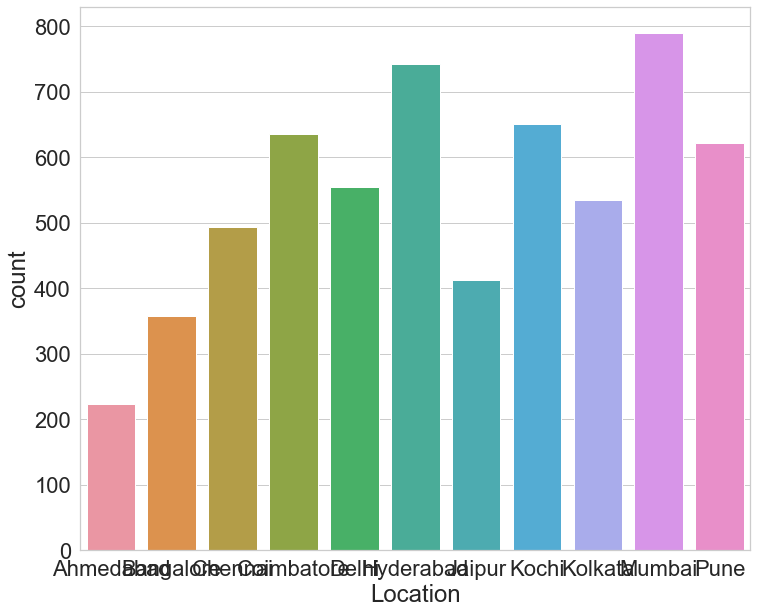

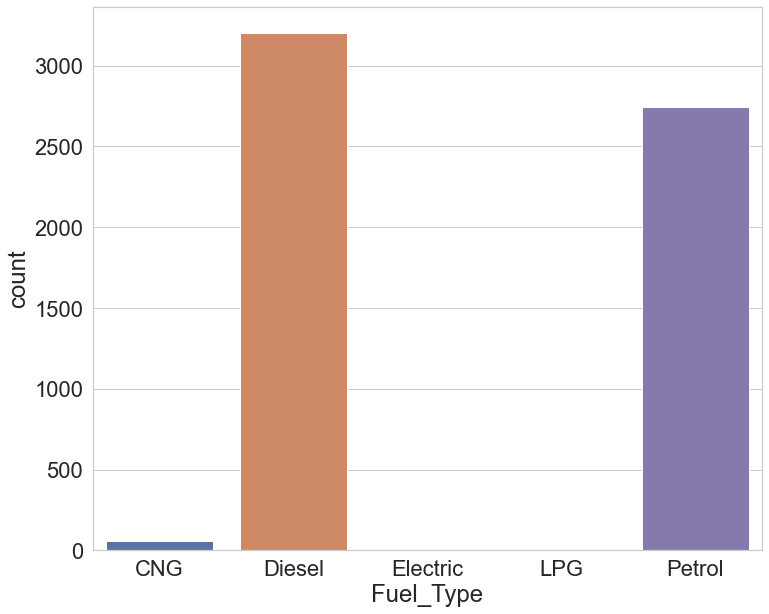

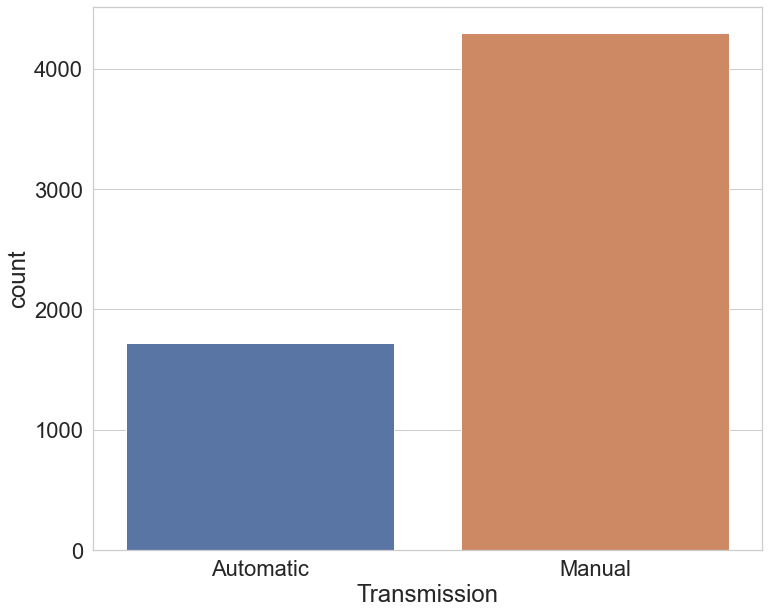

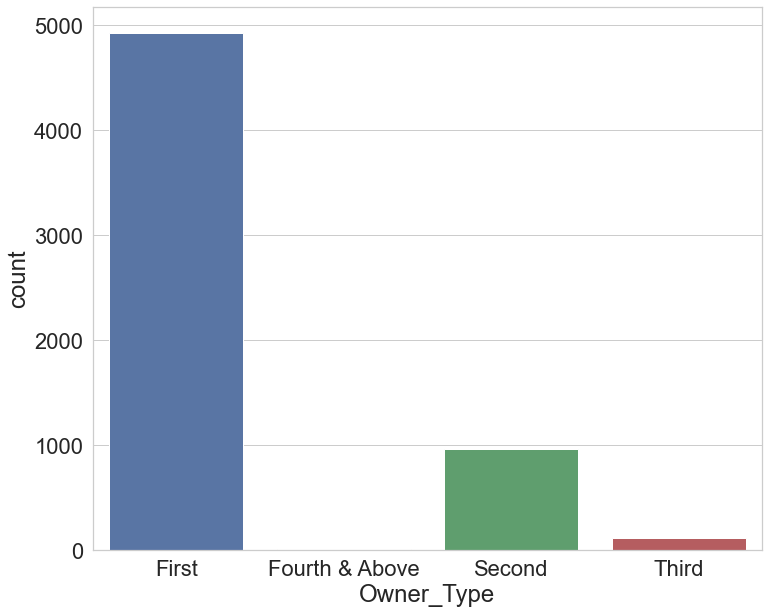

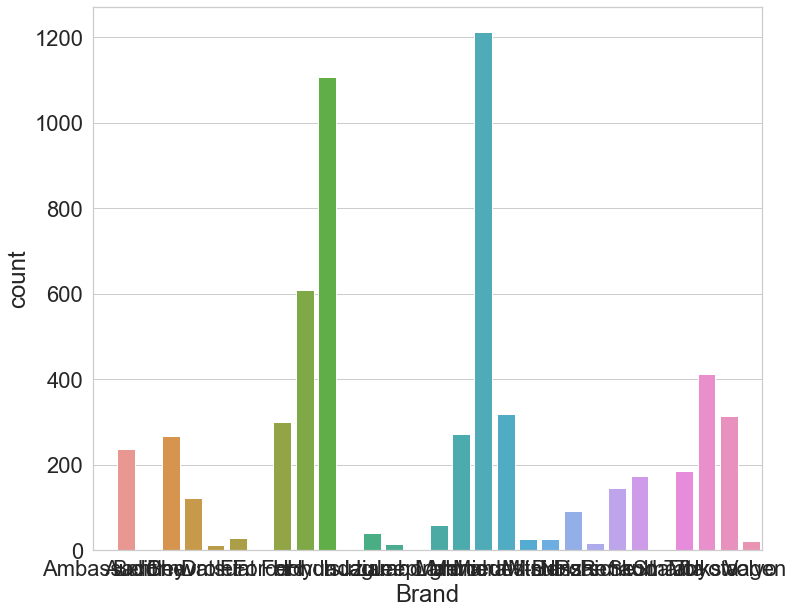

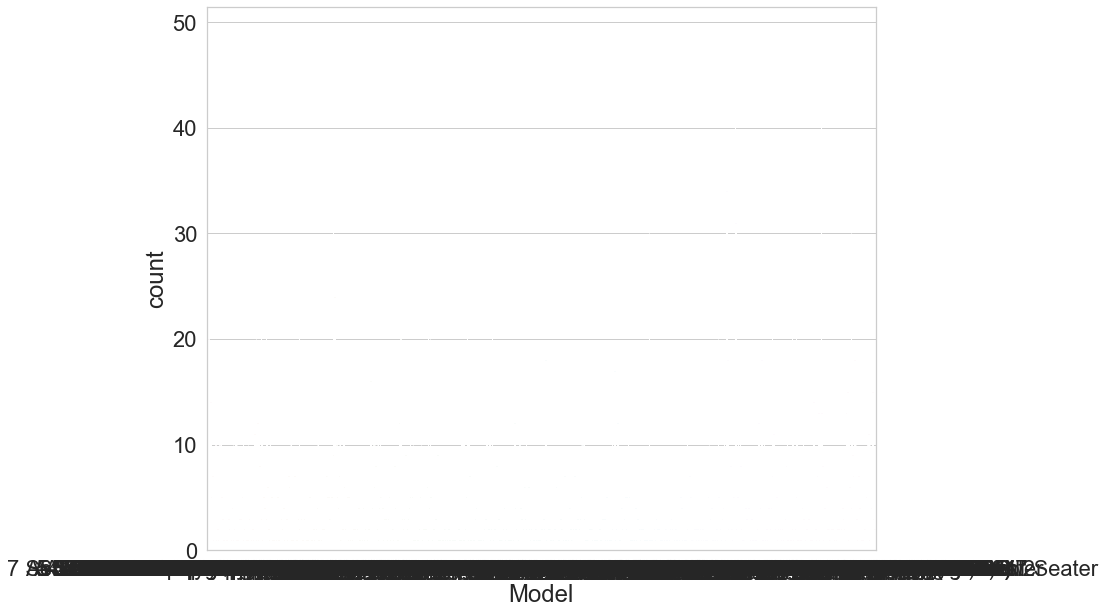

In [82]:
for i in list(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Brand', 'Model']):  
     plt.figure(figsize= [12,10])
     sns.countplot(df[i])
     plt.show()

<AxesSubplot:>

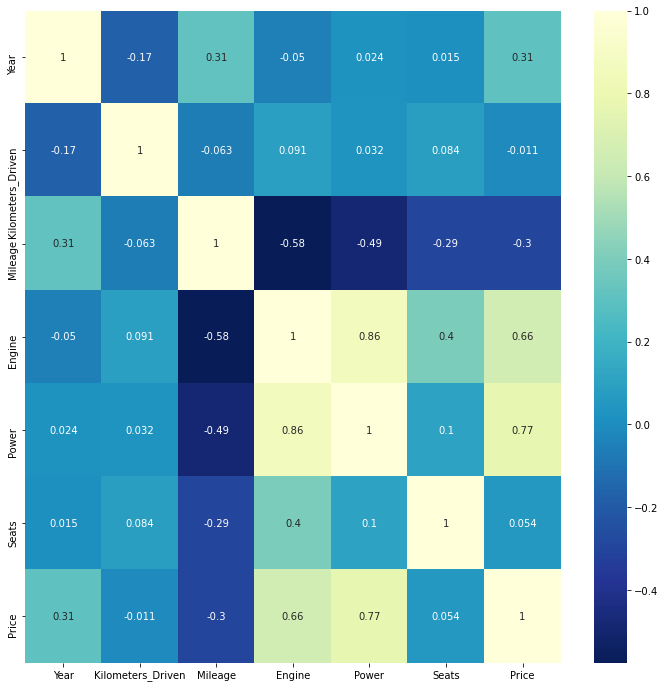

In [37]:
plt.figure(figsize= [12,12])
sns.heatmap(df.corr(), annot=True, cmap= "YlGnBu_r")

In [38]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Feature Engineering

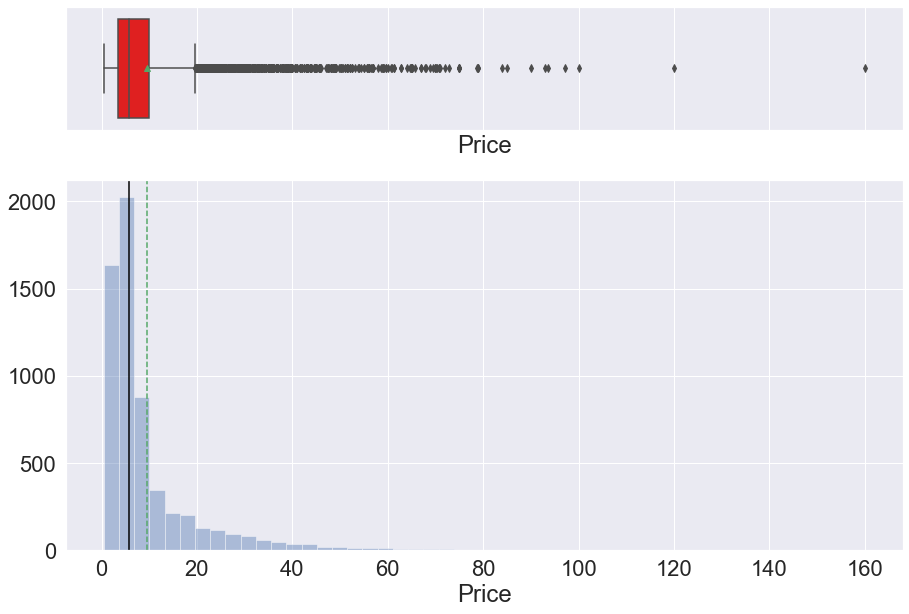

In [39]:
# Explore Price
histogram_boxplot(df.Price)

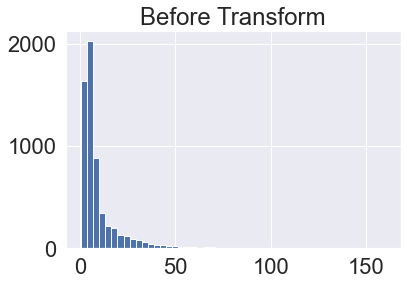

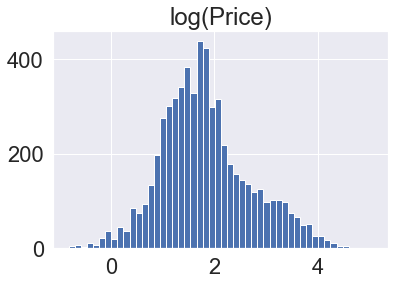

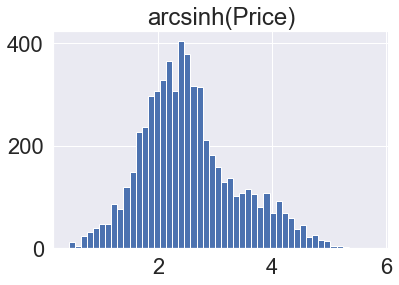

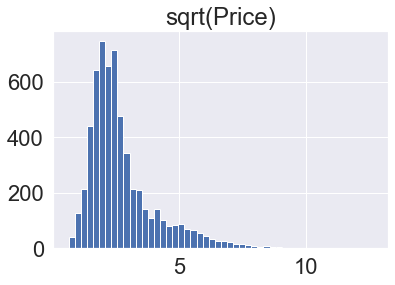

In [40]:
# To reduce skewness of the price lets transform it 
plt.hist(df['Price'], 50)
plt.title('Before Transform')
plt.show()
plt.hist(np.log(df['Price'] + 0.0001), 50)
plt.title('log(Price)')
plt.show()
plt.hist(np.arcsinh(df['Price']), 50)
plt.title('arcsinh(Price)')
plt.show()
plt.hist(np.sqrt(df['Price']), 50)
plt.title('sqrt(Price)')
plt.show()

Looks like Log and Arcsinh Helps with skewness 


In [41]:
df['Price'] = np.log(df['Price']+1)

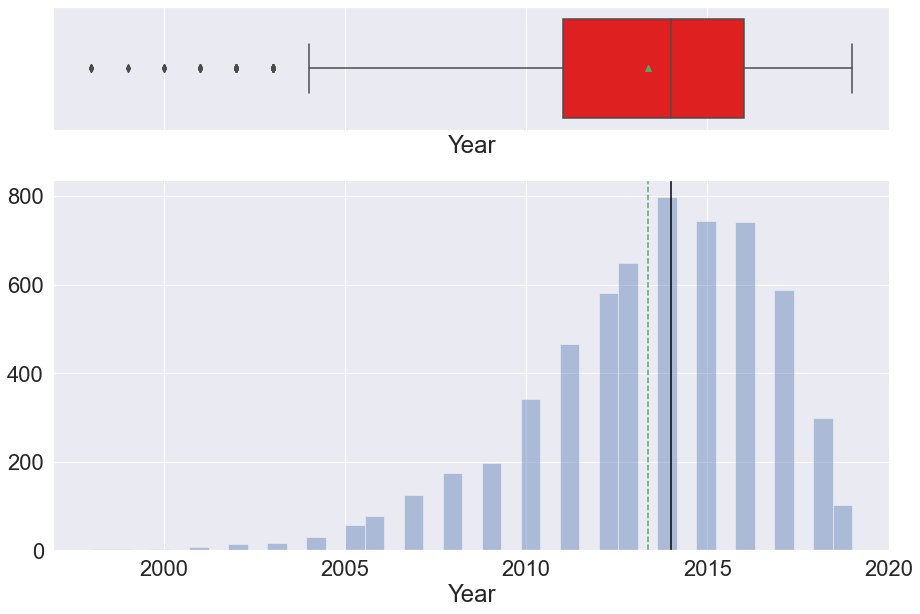

In [42]:
# Explore Year
histogram_boxplot(df.Year)

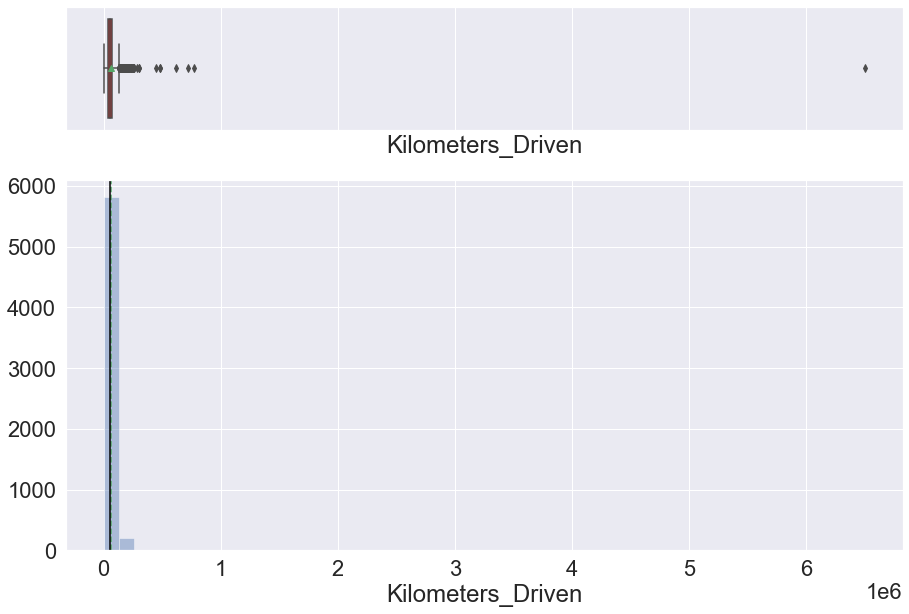

In [43]:
# explore Kilometers_Driven
histogram_boxplot(df.Kilometers_Driven)

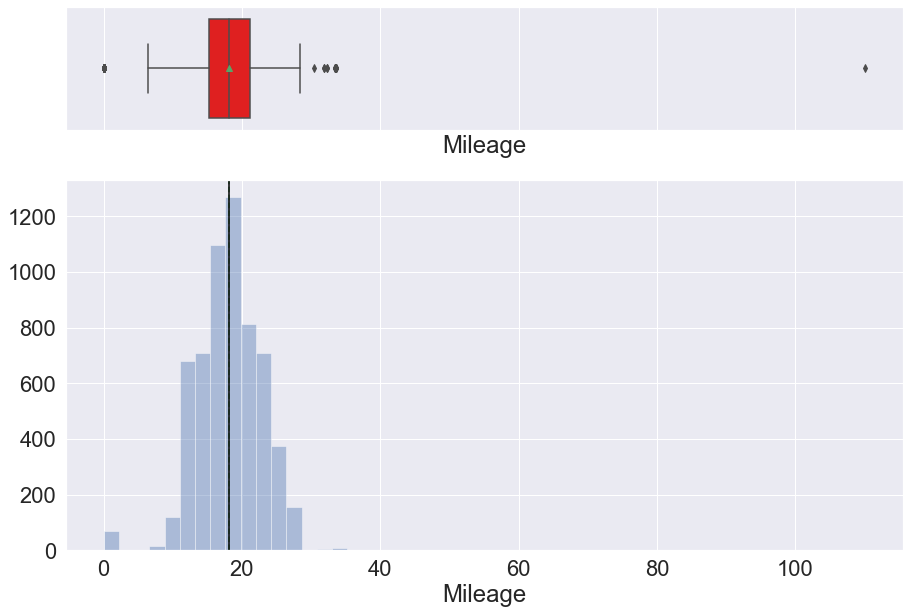

In [44]:
# explore Mileage
histogram_boxplot(df.Mileage)

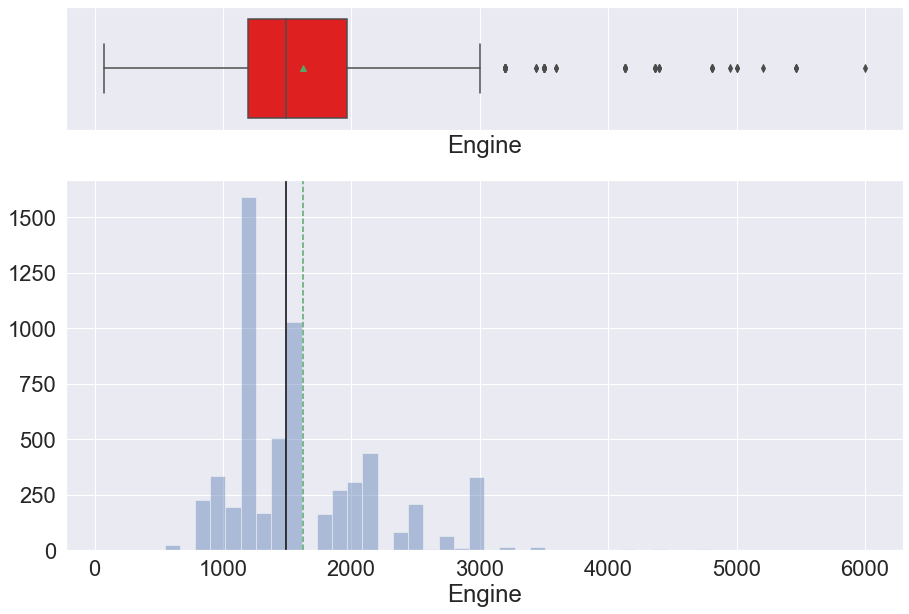

In [45]:
# explore Engine
histogram_boxplot(df.Engine)

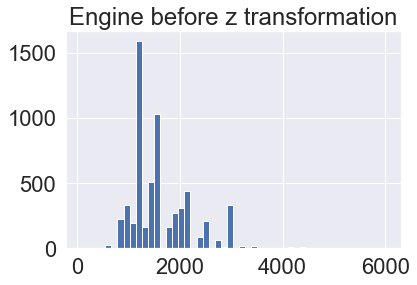

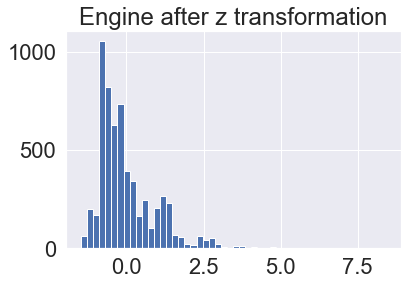

In [46]:
std_scaler = StandardScaler()

df['Engine'].hist(bins=50)
plt.title('Engine before z transformation')
plt.show()
# fit_transform requires a DataFrame, not a Series, hence
# the double brackets to keep df[['Weight']] as a 1 column 
# DataFrame rather than a Series, like if I did df['Weight']


df['Engine'] = std_scaler.fit_transform(df[['Power']])
df['Engine'].hist(bins=50)
plt.title('Engine after z transformation')
plt.show()

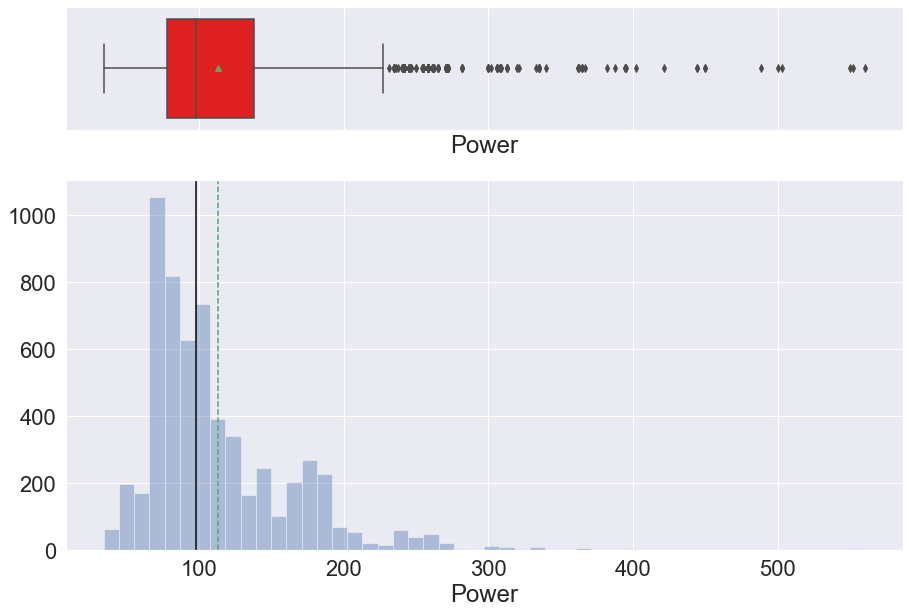

In [47]:
# explore Power
histogram_boxplot(df.Power)

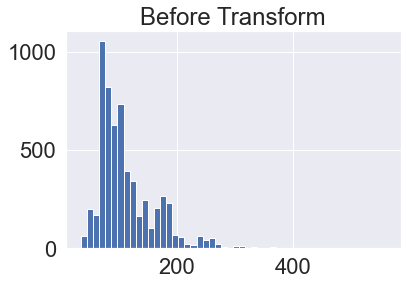

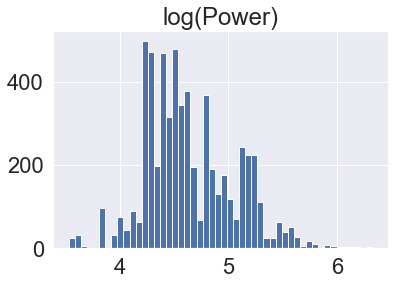

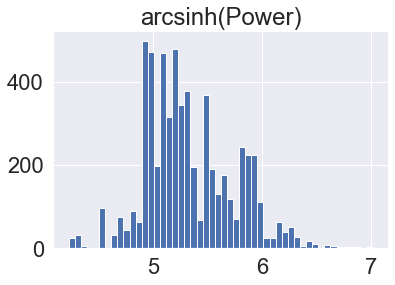

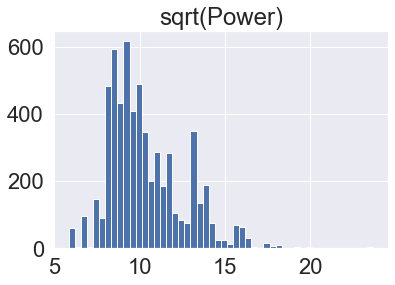

In [48]:
# To reduce skewness of the Power lets transform it 
plt.hist(df['Power'], 50)
plt.title('Before Transform')
plt.show()
plt.hist(np.log(df['Power'] + 0.0001), 50)
plt.title('log(Power)')
plt.show()
plt.hist(np.arcsinh(df['Power']), 50)
plt.title('arcsinh(Power)')
plt.show()
plt.hist(np.sqrt(df['Power']), 50)
plt.title('sqrt(Power)')
plt.show()

Looks like Log has helped a little bit.

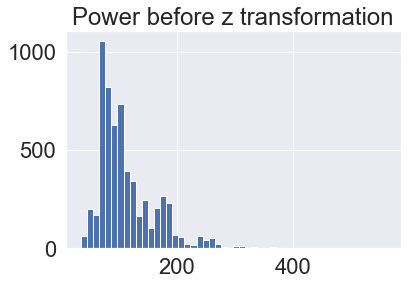

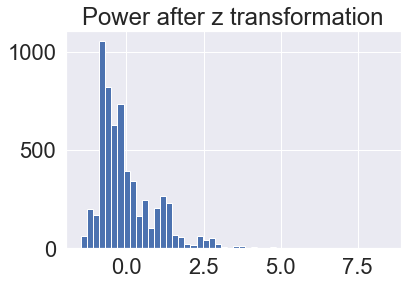

In [49]:
#df['Power'] = np.log(df['Power'])
std_scaler = StandardScaler()

df['Power'].hist(bins=50)
plt.title('Power before z transformation')
plt.show()
# fit_transform requires a DataFrame, not a Series, hence
# the double brackets to keep df[['Weight']] as a 1 column 
# DataFrame rather than a Series, like if I did df['Weight']


df['Power'] = std_scaler.fit_transform(df[['Power']])
df['Power'].hist(bins=50)
plt.title('Power after z transformation')
plt.show()
# exact same shape since it's a linear transformation.


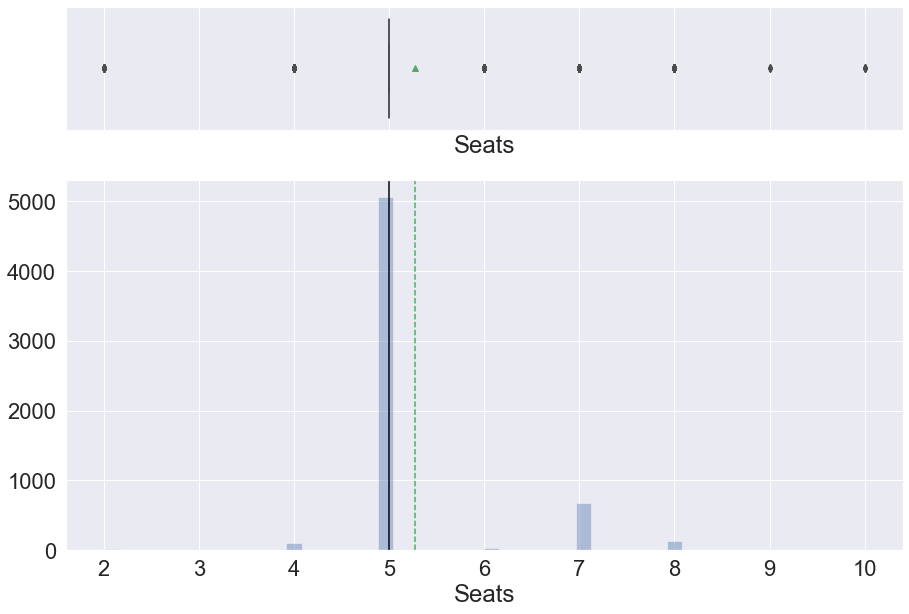

In [50]:
# explore Seats
histogram_boxplot(df.Seats)

- Looks like almost all colums have outliers 
- Mosts Cars have 4 seats otherwise its an outlier, is it even worth having this column?
- May be we could Bin Kilometers driven

In [51]:
# Dropping Seats since most of the cars ahve 4 seats 
df.drop(['Seats'], axis=1, inplace=True)

### Binning for Kilometers Driven


In [52]:

df['Kilometers_Driven_Bin'] = pd.cut(
    df['Kilometers_Driven'], [-np.inf, 34000, 54000, 73000, np.inf], 
    labels = ["Under 34k", "34k to 54k", "54k to 73k", "Over 73k"]
)
df['Kilometers_Driven_Bin'].value_counts(dropna=False)


34k to 54k    1558
Under 34k     1524
Over 73k      1492
54k to 73k    1445
Name: Kilometers_Driven_Bin, dtype: int64

In [53]:
df.drop(['Kilometers_Driven'], axis=1, inplace=True)

In [54]:
df['Kilometers_Driven_Bin'] = df['Kilometers_Driven_Bin'].astype('category')

In [55]:

print("Top 5 Brands with Most Price")
print("="*25)
print(df.groupby("Brand").Price.mean().sort_values(ascending =False).head(5))

print("Top 5 Brands with Least Price")
print("="*25)
print(df.groupby("Brand").Price.mean().sort_values(ascending =True).tail(5))

print(df.groupby("Brand").Price.median().sort_values(ascending =False).tail(5))


Top 5 Brands with Most Price
Brand
Lamborghini    4.795791
Bentley        4.094345
Porsche        3.738577
Jaguar         3.568314
Land           3.553256
Name: Price, dtype: float64
Top 5 Brands with Least Price
Brand
Land           3.553256
Jaguar         3.568314
Porsche        3.738577
Bentley        4.094345
Lamborghini    4.795791
Name: Price, dtype: float64
Brand
Smart         1.386294
Tata          1.360977
Fiat          1.280934
Chevrolet     1.252763
Ambassador    0.854415
Name: Price, dtype: float64


Text(0.5, 0, 'Price')

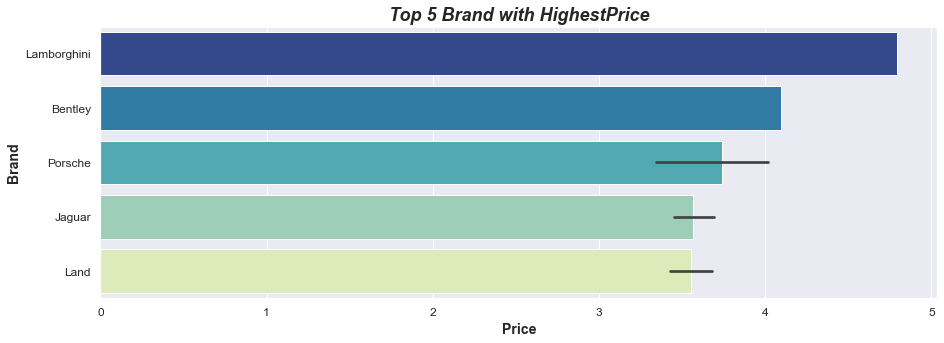

In [56]:
plt.figure(figsize= [15,5])
order= df.groupby("Brand").Price.mean().nlargest(5).index
sns.barplot(y= "Brand", x= "Price", data= df, order= order, palette= "YlGnBu_r")
plt.title("Top 5 Brand with HighestPrice", fontsize= 18,fontweight="bold", fontstyle="italic")
plt.xticks( fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Brand", fontsize= 14, fontweight="bold")
plt.xlabel("Price", fontsize=14, fontweight="bold")

Text(0.5, 0, 'Price')

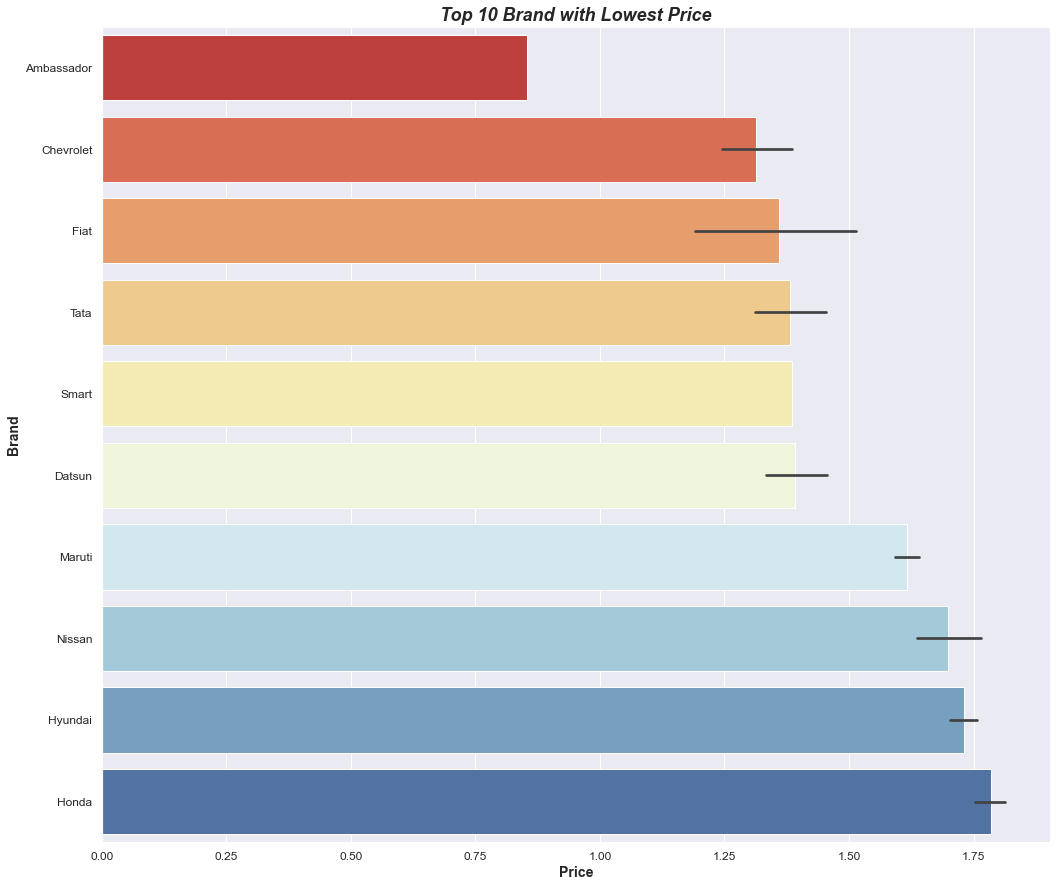

In [57]:
plt.figure(figsize= [17,15])
order=df.groupby("Brand").Price.mean().sort_values(ascending= True)[:10].index
sns.barplot(y= "Brand", x= "Price", data= df, order= order, palette= "RdYlBu")
plt.title("Top 10 Brand with Lowest Price", fontsize= 18,fontweight="bold", fontstyle="italic")
plt.xticks(fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Brand", fontsize= 14, fontweight="bold")
plt.xlabel("Price", fontsize=14, fontweight="bold")

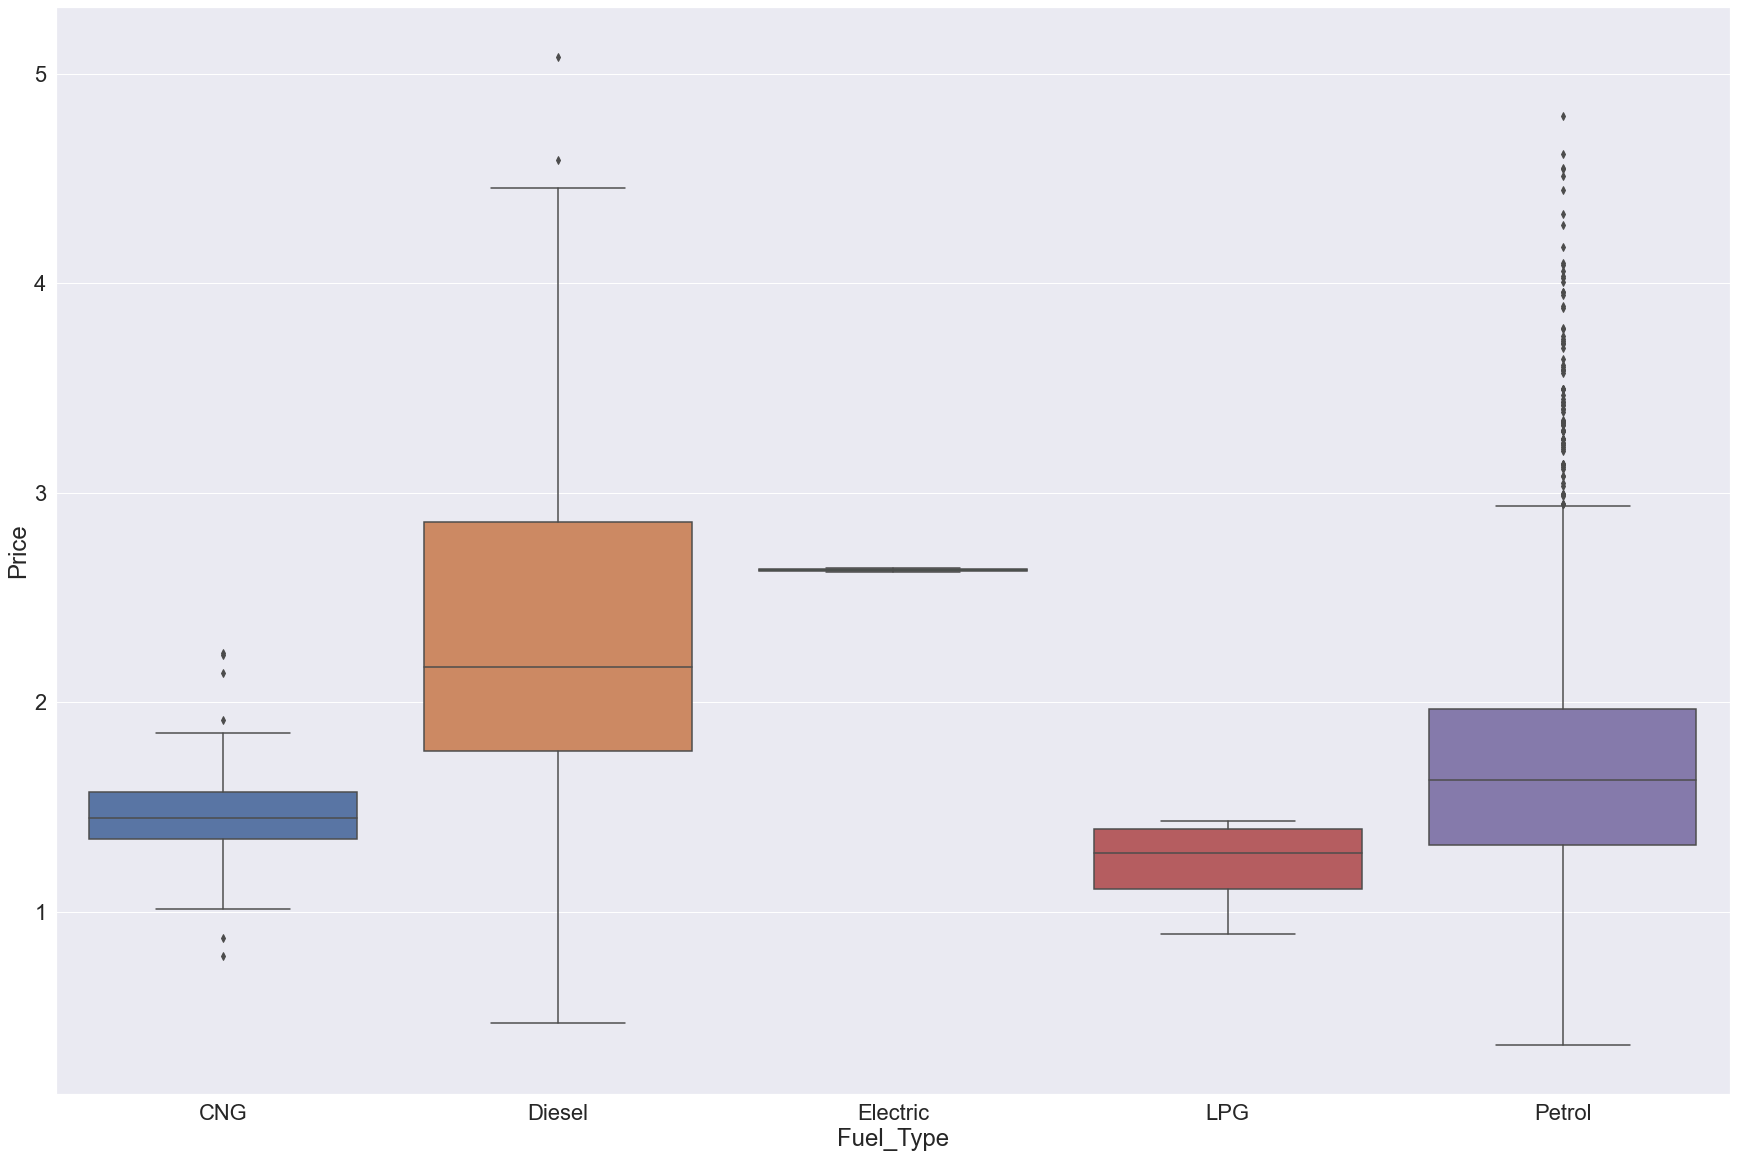

In [58]:
plt.figure(figsize=(30,20))
sns.boxplot(y="Price",x="Fuel_Type",data=df)
plt.show()

In [59]:
# Disel and Petrol have lots of outliers 

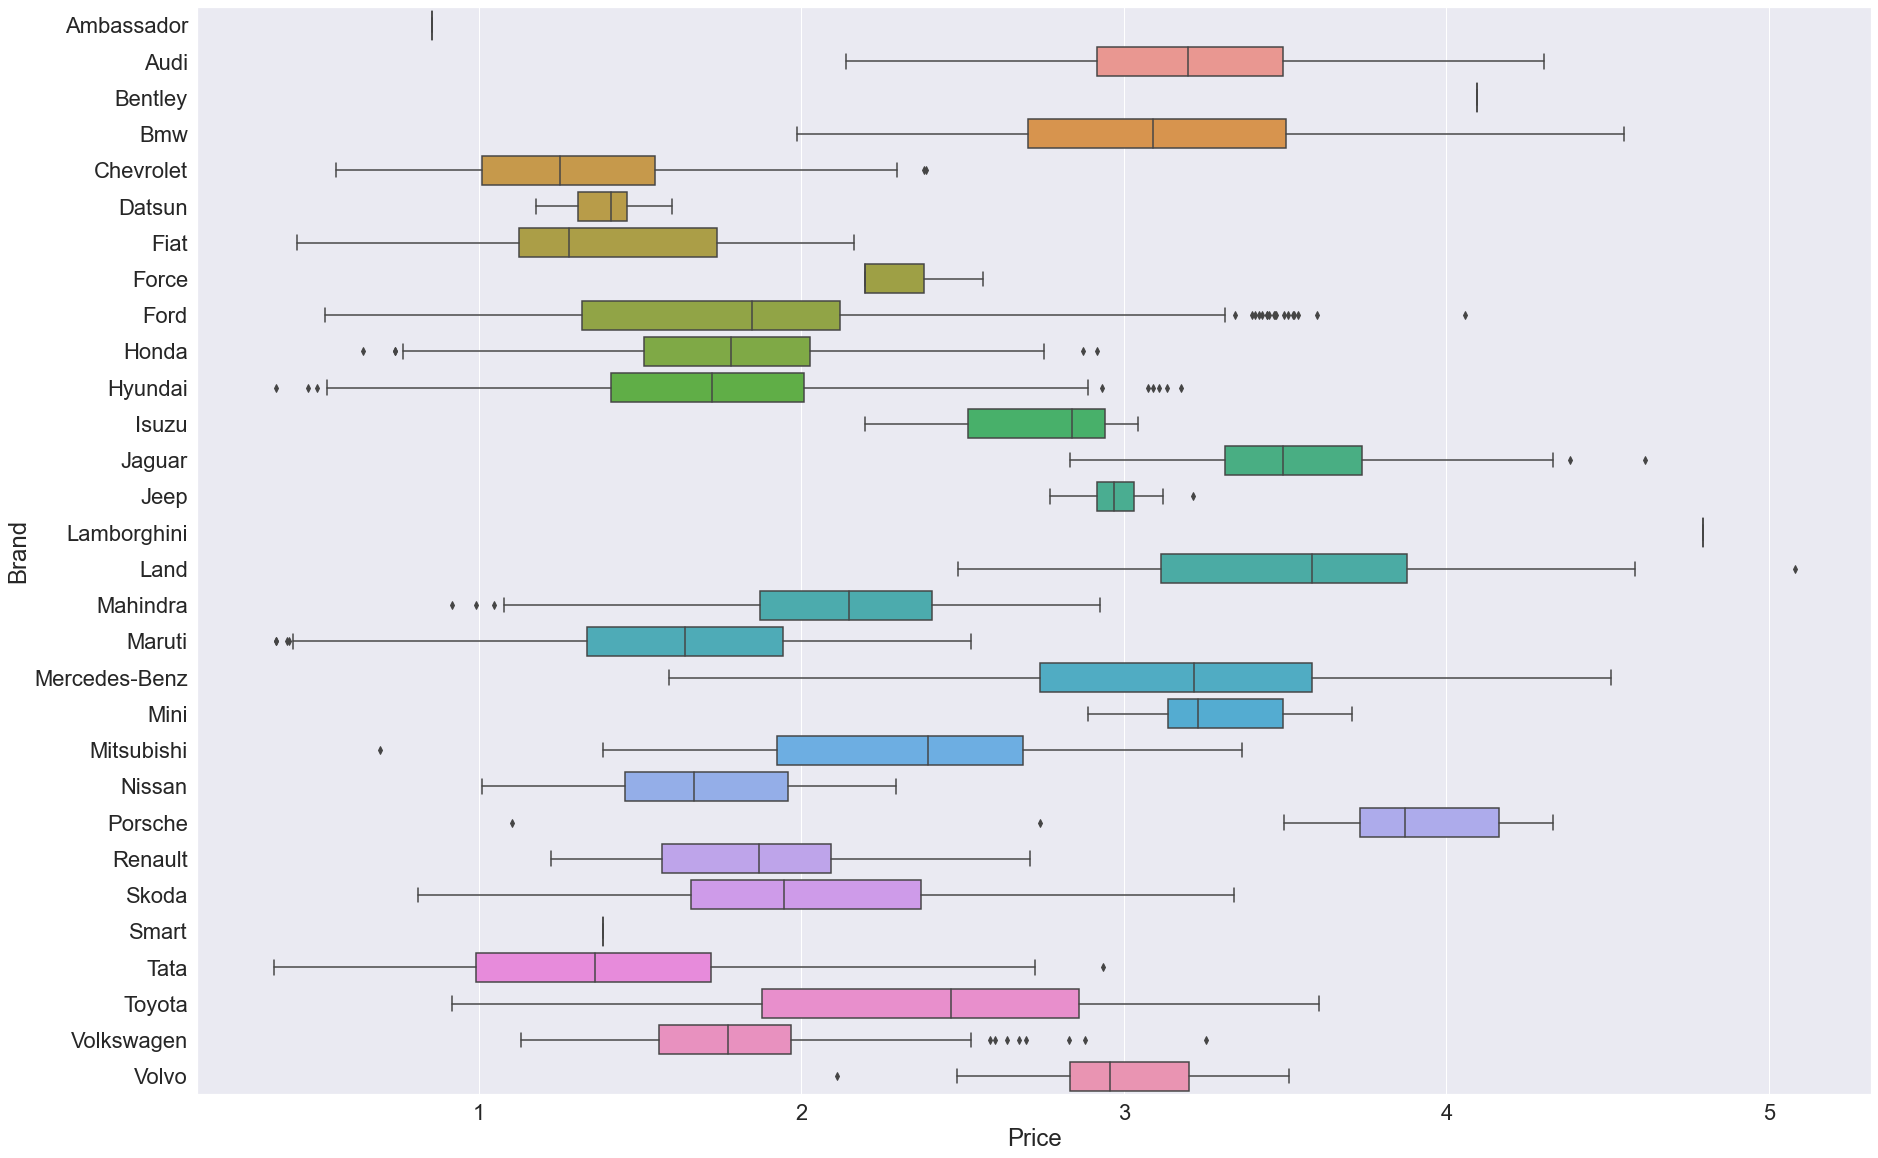

In [60]:
plt.figure(figsize=(30,20))
sns.boxplot(y="Brand",x="Price",data=df)
plt.show()

If the model performance is too low and and high MAPE we could bin the brands into categories like Luxury, Sedans and Economy cars. 

<AxesSubplot:>

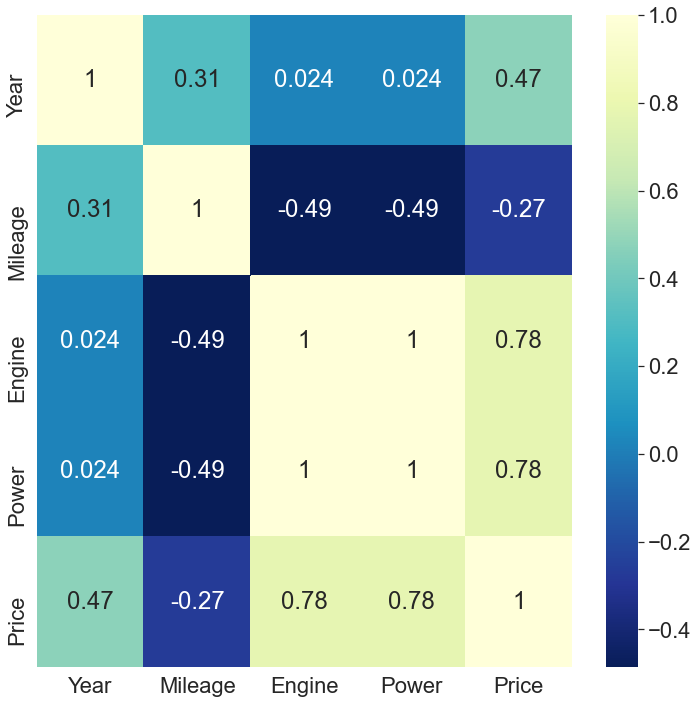

In [61]:
plt.figure(figsize= [12,12])
sns.heatmap(df.corr(), annot=True, cmap= "YlGnBu_r")

After performing Z Transformation on Engine and Power the Correclation between went from .86 to 1. We could just drop one of them. 



In [62]:
# Dropping Engine since most of the cars ahve 4 seats 
df.drop(['Engine'], axis=1, inplace=True)

<AxesSubplot:>

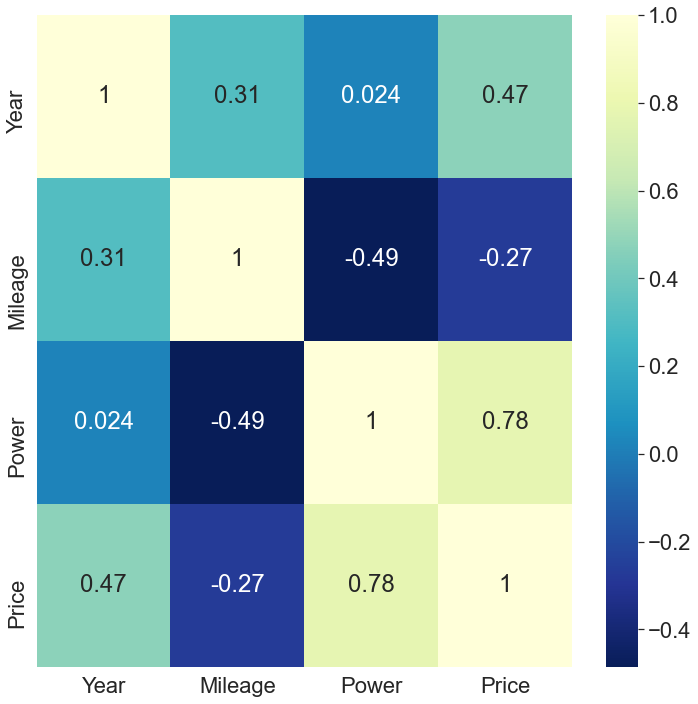

In [63]:
plt.figure(figsize= [12,12])
sns.heatmap(df.corr(), annot=True, cmap= "YlGnBu_r")

## 5. Model Building

In [64]:
#Defining X and y variables
X = df.drop(['Price'], axis=1)
y = df[['Price']]

X.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Brand,Model,Kilometers_Driven_Bin
0,Mumbai,2010,CNG,Manual,First,26.60,-1.027107,Maruti,Wagon R LXI CNG,54k to 73k
1,Pune,2015,Diesel,Manual,First,19.67,0.249937,Hyundai,Creta 1.6 CRDi SX Option,34k to 54k
2,Chennai,2011,Petrol,Manual,First,18.20,-0.453901,Honda,Jazz V,34k to 54k
3,Chennai,2012,Diesel,Manual,First,20.77,-0.452775,Maruti,Ertiga VDI,Over 73k
4,Coimbatore,2013,Diesel,Automatic,Second,15.20,0.523965,Audi,A4 New 2.0 TDI Multitronic,34k to 54k


In [65]:
X = pd.get_dummies(X, columns=['Location', 'Fuel_Type', 'Owner_Type', 'Brand', 'Model', 'Transmission', 'Kilometers_Driven_Bin'], drop_first=True)
X.head()

Year  Mileage     Power  Location_Bangalore  Location_Chennai  \
0  2010    26.60 -1.027107                   0                 0   
1  2015    19.67  0.249937                   0                 0   
2  2011    18.20 -0.453901                   0                 1   
3  2012    20.77 -0.452775                   0                 1   
4  2013    15.20  0.523965                   0                 0   

   Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  \
0                    0               0                   0                0   
1                    0               0                   0                0   
2                    0               0                   0                0   
3                    0               0                   0                0   
4                    1               0                   0                0   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0               0                 0                1              0   
1               0                 0                0              1   
2               0                 0                0              0   
3               0                 0                0              0   
4               0                 0                0              0   

   Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  \
0                 0                   0              0                 0   
1                 1                   0              0                 0   
2                 0                   0              0                 1   
3                 1                   0              0                 0   
4                 1                   0              0                 0   

   Owner_Type_Fourth & Above  Owner_Type_Second  Owner_Type_Third  Brand_Audi  \
0                          0                  0                 0           0   
1                          0                  0                 0           0   
2                          0                  0                 0           0   
3                          0                  0                 0           0   
4                          0                  1                 0           1   

   Brand_Bentley  Brand_Bmw  Brand_Chevrolet  Brand_Datsun  Brand_Fiat  \
0              0          0                0             0           0   
1              0          0                0             0           0   
2              0          0                0             0           0   
3              0          0                0             0           0   
4              0          0                0             0           0   

   Brand_Force  Brand_Ford  Brand_Honda  Brand_Hyundai  Brand_Isuzu  \
0            0           0            0              0            0   
1            0           0            0              1            0   
2            0           0            1              0            0   
3            0           0            0              0            0   
4            0           0            0              0            0   

   Brand_Jaguar  Brand_Jeep  Brand_Lamborghini  Brand_Land  Brand_Mahindra  \
0             0           0                  0           0               0   
1             0           0                  0           0               0   
2             0           0                  0           0               0   
3             0           0                  0           0               0   
4             0           0                  0           0               0   

   Brand_Maruti  Brand_Mercedes-Benz  Brand_Mini  Brand_Mitsubishi  \
0             1                    0           0                 0   
1             0                    0           0                 0   
2             0                    0           0                 0   
3             1                    0           0                 0   
4             0                    0           0         

In [66]:
X.shape

(6019, 1928)

we have close to 2000 columns after creating dummies which might be a lot but lets see the scores with this number. 

In [67]:
### Helpful Methods for Scoring and VIF

In [68]:
# MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame({
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "MAE": mean_absolute_error(y_act, y_pred),
                "MAPE": mape(y_act, y_pred),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])


# Method to drop all the multicollinear columns and choose which one we should drop
def treating_multicollinearity(high_vif_columns, x_train, x_test, y_train, y_test):
    """
    Drop every column that has VIF score greater than 5, one by one.
    Look at the adjusted R square of all these models
    Look at the RMSE of all these models on test data
    """
    adj_rsq_scores = []
    rmse_test_data = []
    mape_test_data = []

    # build ols models by dropping one of these at a time and observe the Adjusted R-squared
    for cols in high_vif_columns:
        train = x_train.loc[:, ~x_train.columns.str.startswith(cols)]
        test = x_test.loc[:, ~x_test.columns.str.startswith(cols)]
        # Create the model
        
        model = LinearRegression(fit_intercept=False)
        model.fit(train, y_train)
        
        y_pred = model.predict(test)
        y_act = y_test.values
        
    
        #MSAP 
        mape_val =  mape(y_act, y_pred)
        mape_test_data.append(mape(y_act, y_pred))
        # Adj R-Sq
        adj_rsq_scores.append(adj_r2(train, y_train, model.predict(train)))
        # RMSE (Test data)
        y_pred_test_Price = model.predict(test)
        y_test_Price = y_test
        rmse_test_data.append(np.sqrt(mean_squared_error(y_pred_test_Price, y_test_Price)))

    # Add new Adj_Rsq and RMSE after dropping each colmn
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj_rsq_after_dropping_col": adj_rsq_scores,
            "Test RMSE": rmse_test_data,
            "MAPE" : mape_test_data
        } 
    ).sort_values(by="Adj_rsq_after_dropping_col", ascending=False)

    print(temp)

### Model 1a

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head(5)

#Fitting linear model
lin_reg_model = LinearRegression()                                    
lin_reg_model.fit(X_train, y_train)   

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_), \
                       index=X_train.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df)

# Checking model performance on train set
print('Training Performance\n')
print(model_perf(lin_reg_model, X_train, y_train))

# Checking model performance on test set
print('Test Performance\n')
print(model_perf(lin_reg_model, X_test, y_test))

                                  Coefficients
Year                              7.912456e-02
Mileage                          -1.093611e-02
Power                             1.852939e-02
Location_Bangalore                1.301124e-01
Location_Chennai                  3.631782e-02
...                                        ...
Transmission_Manual               2.524718e+08
Kilometers_Driven_Bin_34k to 54k -4.410553e-02
Kilometers_Driven_Bin_54k to 73k -7.855658e-02
Kilometers_Driven_Bin_Over 73k   -1.028513e-01
Intercept                         9.053768e+09

[1929 rows x 1 columns]
Training Performance

       RMSE       MAE      MAPE       R^2  Adjusted R^2
0  0.088019  0.057086  3.280761  0.985974      0.974135
Test Performance

           RMSE           MAE          MAPE           R^2  Adjusted R^2
0  1.023914e+09  1.503674e+08  8.369083e+09 -1.817297e+18  2.666846e+19


Score on this model seems terrible when you compare Test vs Training, lets try by removing model column.

### Model 2 Dropping  Car Model 

In [70]:
X = df.drop(['Price', 'Model'], axis=1)
X.head()

# Creating dummy variables
X = pd.get_dummies(X, columns=['Location', 'Fuel_Type', 'Owner_Type', 'Brand', 'Transmission', 'Kilometers_Driven_Bin'], drop_first=True)
X.head()

#split the data into train and test
X_train1b, X_test1b, y_train1b, y_test1b = train_test_split(X, y, test_size=0.3)

#Fitting linear model
lin_reg_model = LinearRegression()                                    
lin_reg_model.fit(X_train1b, y_train1b)  

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_), \
                       index=X_train1b.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df)

# Checking model performance on train set
print('Training Performance\n')
print(model_perf(lin_reg_model, X_train1b, y_train1b))

# Checking model performance on train set
print('Test Performance\n')
print(model_perf(lin_reg_model, X_test1b, y_test1b))

# to compute VIF, we first have to add a constant column having value 1 to our input variables

X1 = X.copy()
X1['const'] = 1
X1.head()

vif_series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())



                                  Coefficients
Year                              9.577012e-02
Mileage                          -1.777157e-02
Power                             2.959244e-01
Location_Bangalore                1.395126e-01
Location_Chennai                  4.475992e-02
Location_Coimbatore               9.576622e-02
Location_Delhi                   -4.386599e-02
Location_Hyderabad                1.056189e-01
Location_Jaipur                  -1.214920e-02
Location_Kochi                   -2.351751e-02
Location_Kolkata                 -2.083607e-01
Location_Mumbai                  -2.989445e-02
Location_Pune                    -1.509953e-02
Fuel_Type_Diesel                  2.311556e-01
Fuel_Type_Electric                1.705972e+00
Fuel_Type_LPG                    -5.605187e-02
Fuel_Type_Petrol                 -5.314626e-02
Owner_Type_Fourth & Above         5.303517e-02
Owner_Type_Second                -5.178009e-02
Owner_Type_Third                 -7.875925e-02
Brand_Audi   

This model performance looks good, lets check how it does with VIF 

In [71]:
high_vif_columns = ["Fuel_Type_Diesel","Fuel_Type_Petrol","Brand_Audi","Brand_BMW",
                   "Brand_Chevrolet", "Brand_Datsun", "Brand_Fiat", "Brand_Ford", "Brand_Honda",
                    "Brand_Hyundai", "Brand_Jaguar", "Brand_Jeep",  "Brand_Land", "Brand_Mahindra",
                    "Brand_Maruti", "Brand_Mercedes-Benz", "Brand_Mini", "Brand_Mitsubishi",
                    "Brand_Nissan", "Brand_Porsche", "Brand_Renault", "Brand_Skoda", "Brand_Tata",
                    "Brand_Toyota", "Brand_Volkswagen", "Brand_Volvo"
                   ]

X_train1 = X_train.copy()
X_train1['constant'] = 1

X_test1 = X_test.copy()
X_test1['constant'] = 1

treating_multicollinearity(high_vif_columns, X_train1b, X_test1b, y_train1b, y_test1b)

                    col  Adj_rsq_after_dropping_col  Test RMSE       MAPE
12           Brand_Land                    0.841902   0.305172  14.181401
16           Brand_Mini                    0.841901   0.305115  14.183224
3             Brand_BMW                    0.841865   0.305268  14.179572
10         Brand_Jaguar                    0.841815   0.304555  14.200540
15  Brand_Mercedes-Benz                    0.841802   0.304394  14.199971
2            Brand_Audi                    0.841793   0.304379  14.201375
11           Brand_Jeep                    0.841764   0.304349  14.201292
23         Brand_Toyota                    0.841764   0.304292  14.200869
19        Brand_Porsche                    0.841748   0.304206  14.207772
17     Brand_Mitsubishi                    0.841707   0.304167  14.203262
1      Fuel_Type_Petrol                    0.841683   0.305594  14.198379
25          Brand_Volvo                    0.841651   0.303951  14.205161
13       Brand_Mahindra               

Lets check if we  Drop Fuel_Type_Petrol and one of the Brand columns we can reduce VIF

### Model c - Reduce Multicollinearity 

In [72]:
X.drop(['Brand_Chevrolet', 'Fuel_Type_Diesel'], axis=1, inplace=True)
X.head()

#split the data into train and test
X_train1c, X_test1c, y_train1c, y_test1c = train_test_split(X, y, test_size=0.3)

#Fitting linear model
lin_reg_modelc = LinearRegression()                                    
lin_reg_modelc.fit(X_train1c, y_train1c)


coef_df = pd.DataFrame(np.append(lin_reg_modelc.coef_.flatten(), lin_reg_modelc.intercept_), \
                       index=X_train1c.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df.round(5).sort_values(by='Coefficients', ascending=False))

# Checking model performance on train set
print('Training Performance\n')
print(model_perf(lin_reg_modelc, X_train1c, y_train1c))

# Checking model performance on train set
print('Training Performance\n')
print(model_perf(lin_reg_modelc, X_test1c, y_test1c))


# to compute VIF, we first have to add a constant column having value 1 to our input variables

X1 = X.copy()
X1['const'] = 1
X1.head()

vif_series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

                                  Coefficients
Fuel_Type_Electric                     1.42002
Brand_Mini                             1.16329
Brand_Land                             1.06125
Brand_Porsche                          0.97320
Brand_Jaguar                           0.80039
Brand_Mercedes-Benz                    0.79907
Brand_Audi                             0.76215
Brand_Bmw                              0.72240
Brand_Mitsubishi                       0.53394
Brand_Toyota                           0.52428
Brand_Volvo                            0.52081
Brand_Force                            0.39698
Brand_Isuzu                            0.37654
Brand_Jeep                             0.36921
Power                                  0.31062
Brand_Skoda                            0.28846
Brand_Honda                            0.26655
Brand_Maruti                           0.24529
Brand_Hyundai                          0.21998
Brand_Mahindra                         0.20930
Brand_Nissan 

### MEAN OF RESIDUALS 

In [73]:
# predicted values
fitted = lin_reg_modelc.predict(X_train1c)
residual = (fitted - y_train1c.values)

np.mean(residual)

1.439637501174511e-14

* Mean of redisuals is very close to 0.

### TEST FOR LINEARITY 

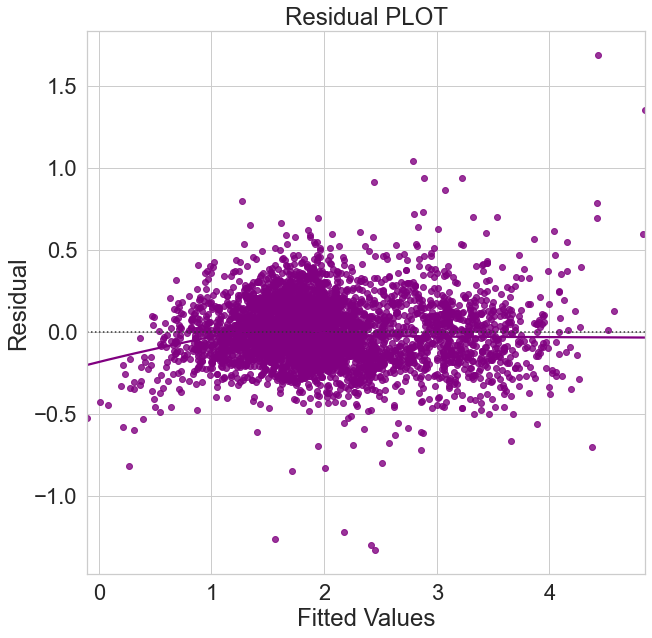

In [74]:
plt.figure(figsize= [10,10])
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)


plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

This shows the scatter plot between errors and predicted values. i dont belive thereis a pattern here and hence 

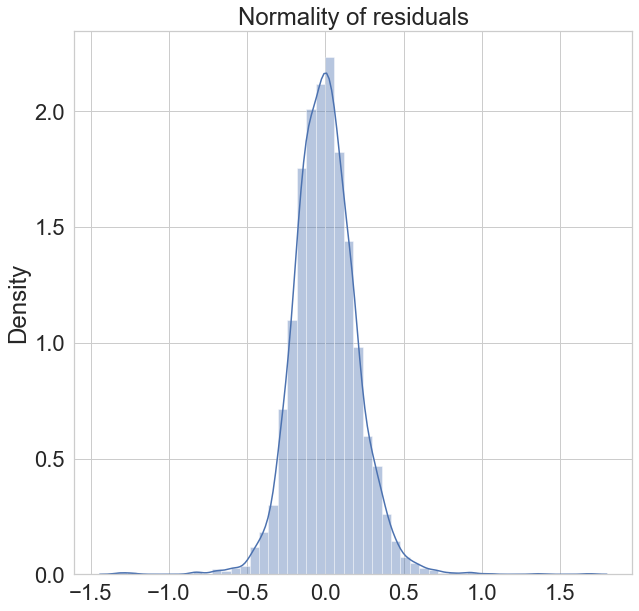

In [75]:
plt.figure(figsize= [10,10])
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

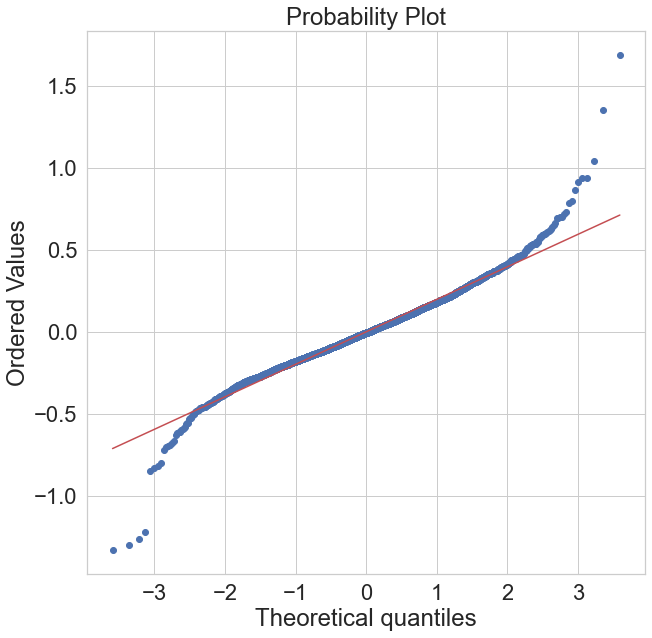

In [76]:
plt.figure(figsize= [10,10])
stats.probplot(residual.flatten(),dist="norm",plot=pylab)
plt.show()

Text(0.5, 0, 'Actual')

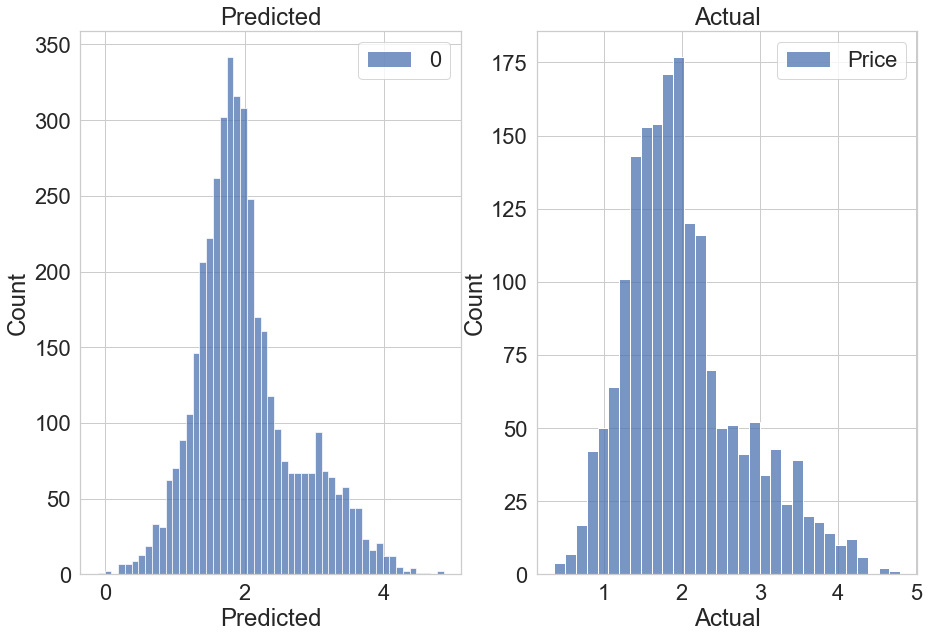

In [77]:
plt.figure(figsize= [15,10])

plt.subplot(1,2,1)
sns.histplot(fitted)
plt.title("Predicted")
plt.xlabel("Predicted")
plt.subplot(1,2,2)
sns.histplot(y_test1c)
plt.title("Actual")
plt.xlabel("Actual")

In [78]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              6048.
Date:                Sat, 24 Apr 2021   Prob (F-statistic):                        0.00
Time:                        15:46:36   Log-Likelihood:                         -1224.7
No. Observations:                6019   AIC:                                      2551.
Df Residuals:                    5968   BIC:                                      2893.
Df Model:                          51                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

## Insights 

1. Fuel_Type_Electric[ 1.40692]  has a positive impact on the price of the used car. 
2. Kolkata has the most negative impact on the used car price [-0.18617]
3. Bangalore has positive effect on the Used Car price. 
4. Fuel_Type LPG & Petro  has most negative effect on the price of the car. 
5. Luxury brands seem to have postive effect on the price of the car [Mini, Landrover and Porse].

